In [ ]:
#discription

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [ ]:
#import dataset
from google.colab import files
uploaded=files.upload()

Saving Binance_BTC_1hr_Dataset.csv to Binance_BTC_1hr_Dataset.csv


In [ ]:
#store the the data into dataframe
df=pd.read_csv("Binance_BTC_1hr_Dataset.csv")

In [ ]:
#show the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40078 entries, 0 to 40077
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         40078 non-null  float64
 1   date         40078 non-null  object 
 2   symbol       40078 non-null  object 
 3   open         40078 non-null  float64
 4   high         40078 non-null  float64
 5   low          40078 non-null  float64
 6   Close        40078 non-null  float64
 7   Volume BTC   40078 non-null  float64
 8   Volume USDT  40078 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.8+ MB


In [ ]:
#setting date as index 
df=df.set_index(pd.DatetimeIndex(df["date"].values))
df.head()

ParserError: ignored

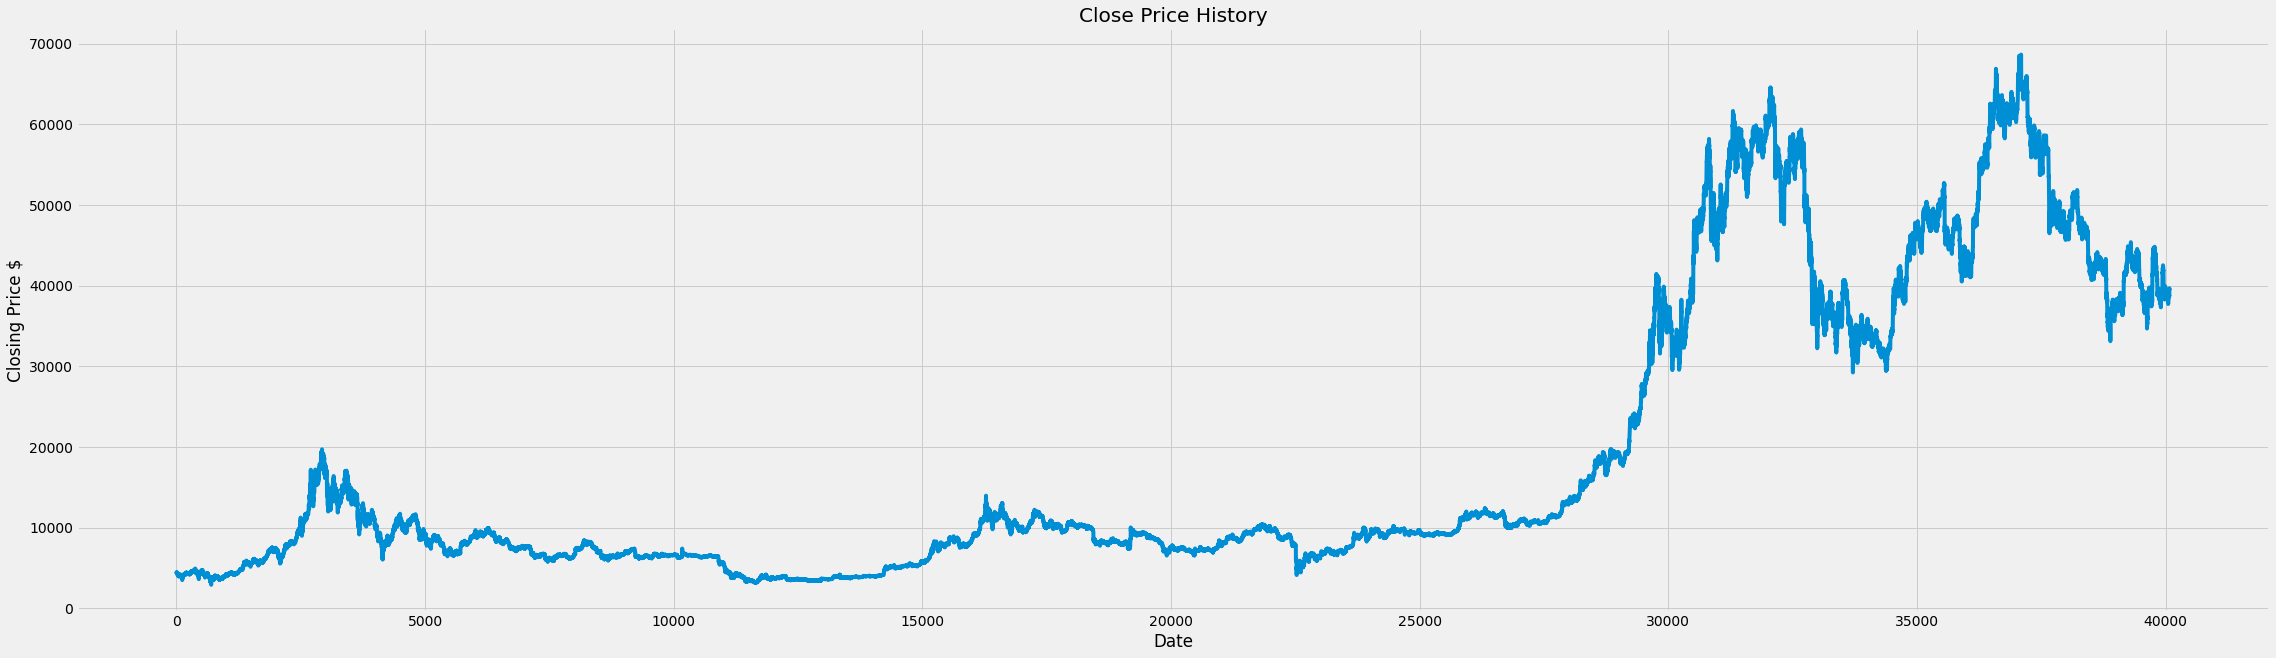

In [ ]:
#Visual representation of Closing BTC Price
plt.figure(figsize=(35,10))
plt.plot(df["Close"],label="Close")
plt.title("Close Price History")
plt.xlabel("Date")
plt.ylabel("Closing Price $")
plt.show()

In [ ]:
#calculating 12 day exponential moving average and 26 day exponential moving average and subtracting it for our indicator signal
#calculating 12 day EMA
shortEMA=df["Close"].ewm(span=12,adjust=False).mean()
#calculating 26 day EMA
longEMA=df["Close"].ewm(span=26,adjust=False).mean()
#calculating difference of shortEMA and longEMA for difference moving average line
DMA=shortEMA-longEMA
#calculating exponential average of DMA line for quick movement 
signal=DMA.ewm(span=9,adjust=False).mean()

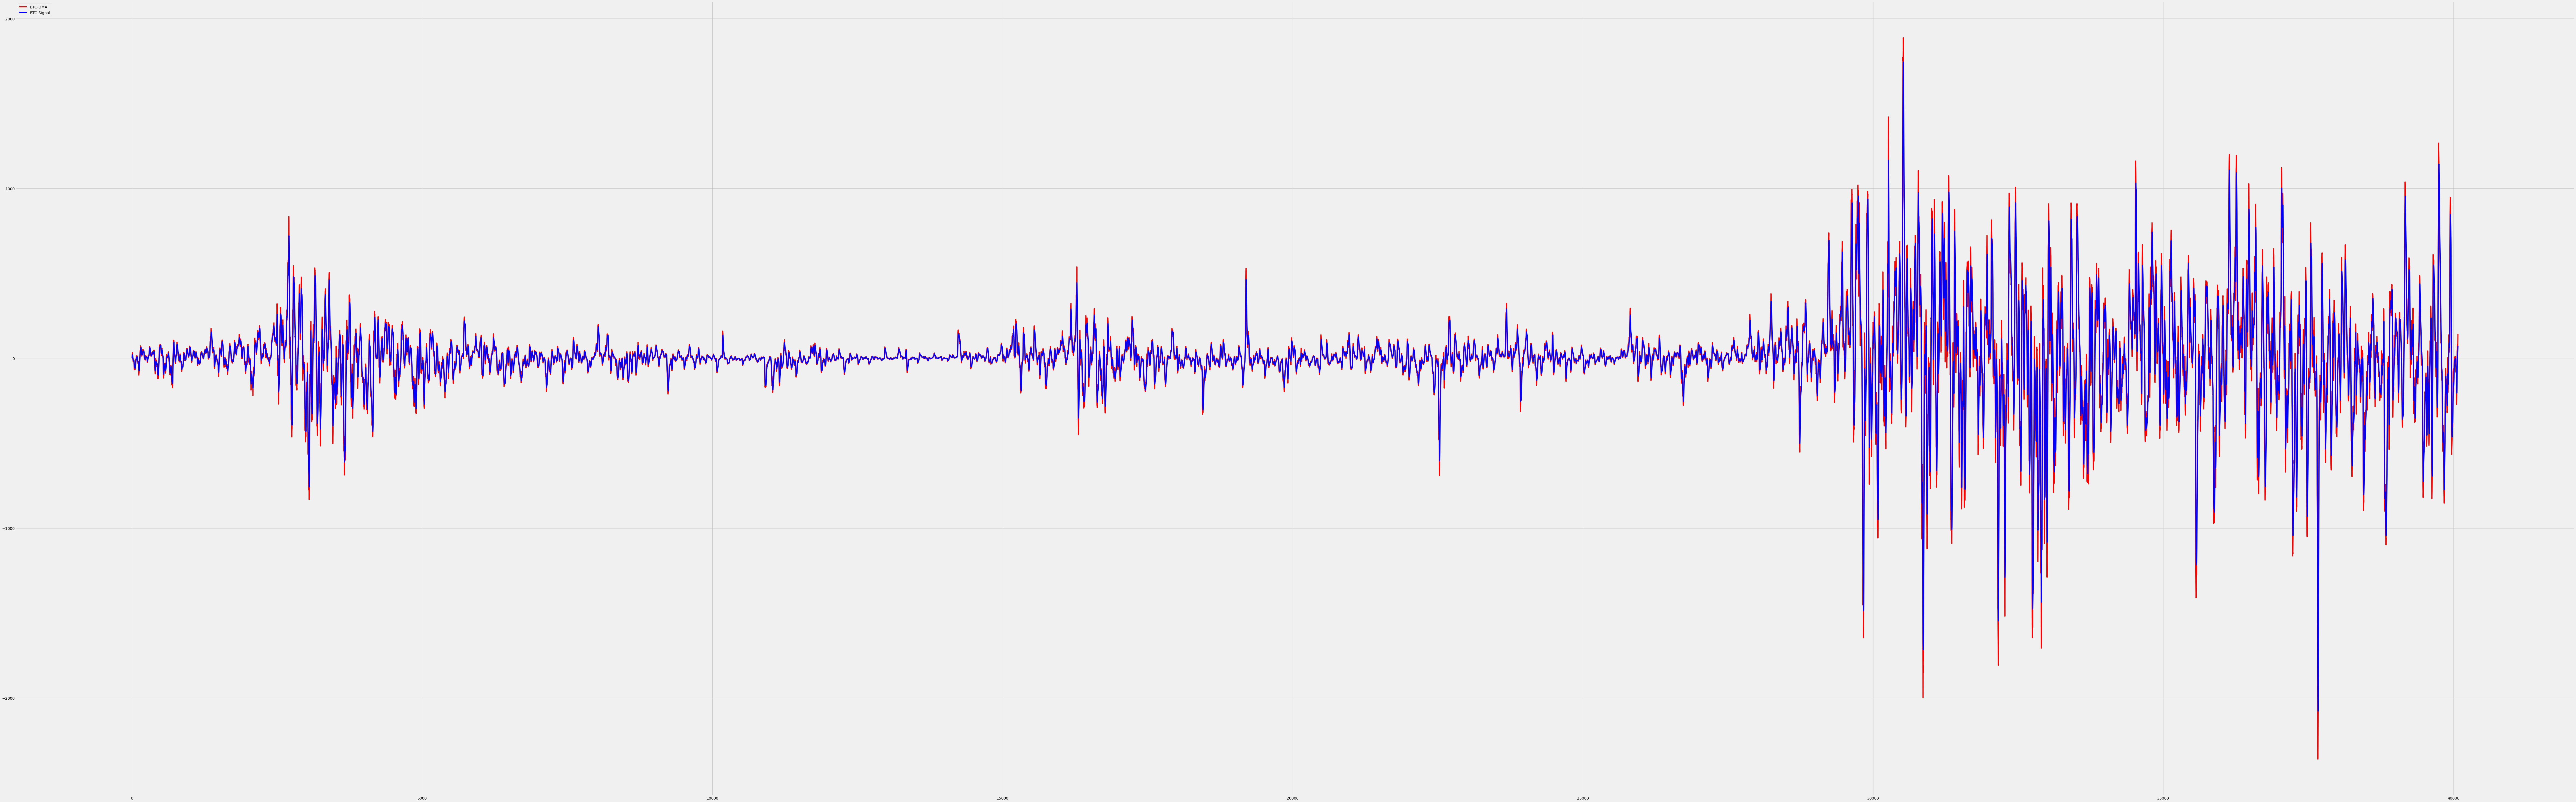

In [ ]:
#plotting both chart DMA and signal
plt.figure(figsize=(150,50))
plt.plot(df.index,DMA,label="BTC-DMA",color="red")
plt.plot(df.index,signal,label="BTC-Signal",color="blue")
plt.legend(loc="upper left")
plt.show()


In [ ]:
#Adding DMA and Signal to our dataframe 
df["DMA"] = DMA
df["Signal"] = signal

df.head()

,unix,date,symbol,open,high,low,Close,Volume BTC,Volume USDT,DMA,Signal
0,1.502950e+09,2017-08-17 06-AM,BTC/USDT,4315.32,4345.45,4309.37,4324.35,7.2300,31282.31,0.000000,0.000000
1,1.502953e+09,2017-08-17 07-AM,BTC/USDT,4324.35,4349.99,4287.41,4349.99,4.4400,19241.06,2.045356,0.409071
2,1.502957e+09,2017-08-17 08-AM,BTC/USDT,4349.99,4377.85,4333.32,4360.69,0.9499,4139.70,4.478095,1.222876
3,1.502960e+09,2017-08-17 09-AM,BTC/USDT,4360.69,4445.78,4360.00,4444.00,10.7600,47219.36,12.978867,3.574074
4,1.502964e+09,2017-08-17 10-AM,BTC/USDT,4444.00,4470.00,4399.81,4460.00,23.9400,106203.72,20.767462,7.012752


In [ ]:
#creating function to represent when to buy and sell
def buy_sell(signal):
  Buy=[]
  Sell=[]
  flag=-1

  for i in range(0,len(signal)):
    if signal["DMA"][i] > signal["Signal"][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal["Close"][i])
        flag=1
      else:
        Buy.append(np.nan)
    elif signal["DMA"][i] < signal["Signal"][i]:
      Buy.append(np.nan)      
      if flag != 0:
        Sell.append(signal["Close"][i])
        flag=0
      else:
        Sell.append(np.nan)
    else :
      Buy.append(np.nan)    
      Sell.append(np.nan)

  return(Buy,Sell)      


In [ ]:
#creating Buy and Sell column
a=buy_sell(df)
df["Buy_signal"]=a[0]
df["Sell_signal"]=a[1]


In [ ]:
#showing data and confirming if everything is added in dataframe or not
df.head()

,unix,date,symbol,open,high,low,Close,Volume BTC,Volume USDT,DMA,Signal,Buy_signal,Sell_signal
0,1.502950e+09,2017-08-17 06-AM,BTC/USDT,4315.32,4345.45,4309.37,4324.35,7.2300,31282.31,0.000000,0.000000,NaN,NaN
1,1.502953e+09,2017-08-17 07-AM,BTC/USDT,4324.35,4349.99,4287.41,4349.99,4.4400,19241.06,2.045356,0.409071,4349.99,NaN
2,1.502957e+09,2017-08-17 08-AM,BTC/USDT,4349.99,4377.85,4333.32,4360.69,0.9499,4139.70,4.478095,1.222876,NaN,NaN
3,1.502960e+09,2017-08-17 09-AM,BTC/USDT,4360.69,4445.78,4360.00,4444.00,10.7600,47219.36,12.978867,3.574074,NaN,NaN
4,1.502964e+09,2017-08-17 10-AM,BTC/USDT,4444.00,4470.00,4399.81,4460.00,23.9400,106203.72,20.767462,7.012752,NaN,NaN


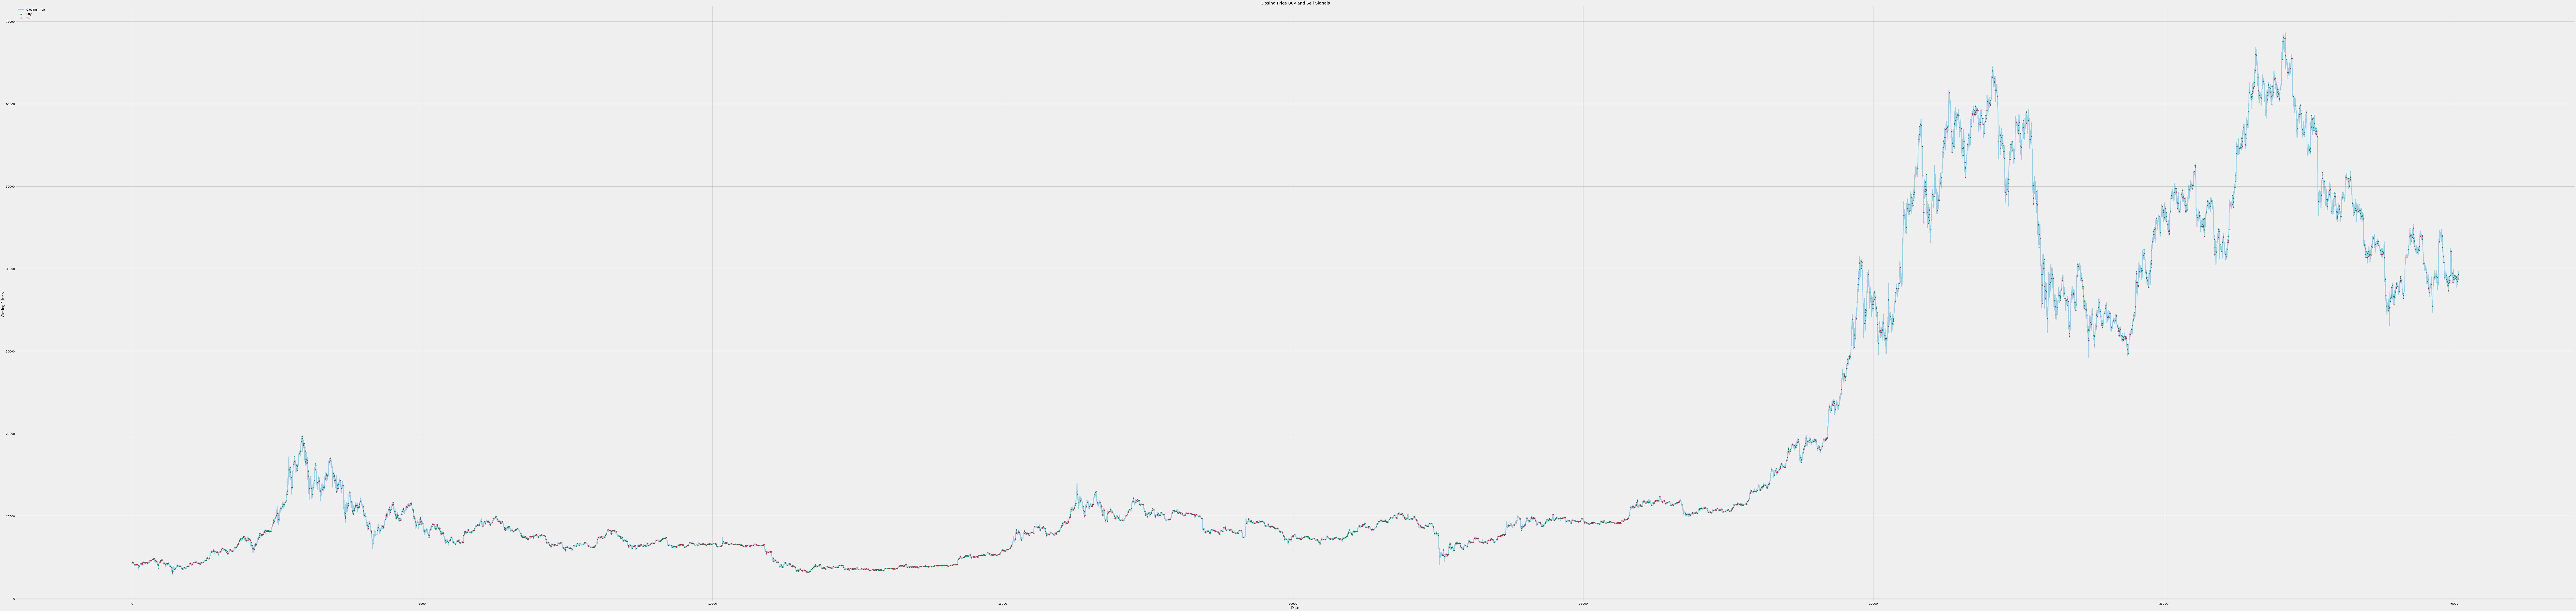

In [ ]:
#Visual Representation of BTC buy and sell Signal
plt.figure(figsize=(200,50))
plt.scatter(df.index,df["Buy_signal"],label="Buy",color="green",marker="^",alpha=1)
plt.scatter(df.index,df["Sell_signal"],label="Sell",color="red",marker="v",alpha=1)

plt.plot(df["Close"],label="Closing Price",alpha=0.35)
plt.title("Closing Price Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("Closing Price $ ")

plt.legend(loc="upper left")

plt.show()

In [ ]:
#for downloading csv file
#files.download("Binance_BTC_1hr_Dataset.csv")
df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df

,unix,date,symbol,open,high,low,Close,Volume BTC,Volume USDT,DMA,Signal,Buy_signal,Sell_signal
0,1.502950e+09,2017-08-17 06-AM,BTC/USDT,4315.32,4345.45,4309.37,4324.35,7.23000,3.128231e+04,0.000000,0.000000,NaN,NaN
1,1.502953e+09,2017-08-17 07-AM,BTC/USDT,4324.35,4349.99,4287.41,4349.99,4.44000,1.924106e+04,2.045356,0.409071,4349.99,NaN
2,1.502957e+09,2017-08-17 08-AM,BTC/USDT,4349.99,4377.85,4333.32,4360.69,0.94990,4.139700e+03,4.478095,1.222876,NaN,NaN
3,1.502960e+09,2017-08-17 09-AM,BTC/USDT,4360.69,4445.78,4360.00,4444.00,10.76000,4.721936e+04,12.978867,3.574074,NaN,NaN
4,1.502964e+09,2017-08-17 10-AM,BTC/USDT,4444.00,4470.00,4399.81,4460.00,23.94000,1.062037e+05,20.767462,7.012752,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40073,1.647288e+12,2022-03-14 20:00:00,BTC/USDT,38814.18,38940.00,38702.00,38723.35,1015.60887,3.943958e+07,26.609736,33.268848,NaN,38723.35
40074,1.647292e+12,2022-03-14 21:00:00,BTC/USDT,38723.35,38787.21,38606.41,38729.97,698.12721,2.703083e+07,18.975995,30.410277,NaN,NaN
40075,1.647295e+12,2022-03-14 22:00:00,BTC/USDT,38729.97,39947.12,38677.68,39326.12,4794.81203,1.888155e+08,60.335018,36.395225,39326.12,NaN
40076,1.647299e+12,2022-03-14 23:00:00,BTC/USDT,39326.12,39784.25,39326.11,39671.37,2191.13079,8.678891e+07,119.592543,53.034689,NaN,NaN
